In [2]:
from neo4j import GraphDatabase
import pandas as pd
import numpy as np

In [3]:
uri = "bolt://34.101.192.24:7687"
username = "neo4j"
password = "unej1234"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [4]:
def extract_node_properties():
    with driver.session() as session:
        # Cypher query to fetch node properties
        query = """
        MATCH (n)
        RETURN n.Vector AS vector, n.label AS label, labels(n) AS kelas, n.abstract AS keterangan
        """
        result = session.run(query)
        # Extract properties and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        return df


In [5]:
node_df = extract_node_properties()
cleaned_kelas = node_df['kelas'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
node_df['kelas'] = cleaned_kelas
node_df

,vector,label,kelas,keterangan
0,"[0.03639092668890953, -0.024370986968278885, -...",Metalaxyl,[Fungisida],Metalaxyl adalah sejenis fungisida yang diguna...
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],"Penyakit gosong bulir padi, juga dikenal sebag..."
2,"[0.032646406441926956, -0.04352227970957756, 0...",Laba laba,[Biologis],Laba-laba adalah predator umum yang dapat mema...
3,"[0.036355093121528625, 0.043446771800518036, 0...",Trichogramm,[Biologis],Trichogramma atau parasitoid terkait hadir ada...
4,"[0.036346133798360825, -0.03959878906607628, -...",Acidovorax avenae subsp. avenae,[PatogenPadi],Acidovorax avenae subsp. avenae adalah bakteri...
...,...,...,...,...
138,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],Penggerek batang kuning merupakan jenis serang...
139,"[0.03915003314614296, -0.04633839428424835, 0....",Klorpiris,[Pestisida],Klorpirifos adalah insektisida organofosfat. K...
140,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],Rayap dapat menyerang tanaman di semua tahap p...
141,"[0.03916794806718826, 0.019752727821469307, 0....",Daun berkarat,[Gejala],Daun berkarat (pastula) berwarna kuning hingga...


In [6]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
            MATCH (n)-[r]->(m)
            RETURN n.Vector AS source_vector, n.label AS source_label, labels(n) AS source_class, 
                type(r) AS relationship_type,
                m.Vector AS target_vector, m.label AS target_label, labels(m) AS target_class
        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03818255290389061, -0.015258912928402424, -...",Bulir terdapat bercak,[Gejala]
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03753756731748581, 0.005460740067064762, -0...",Bulir pecah,[Gejala]
2,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03612148016691208, 0.0048484764993190765, 0...",Bulir berubah warna,[Gejala]
3,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],terkenaPatogen,"[0.03752860799431801, 0.022415179759263992, 0....",Tilletia barclayana,[PatogenPadi]
4,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],diberikanFungisida,"[0.03760923072695732, -0.030174778774380684, 0...",Pyraclostrobin,[Fungisida]
...,...,...,...,...,...,...,...
249,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[Gejala]
250,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],memilikiGejala,"[0.033894460648298264, -0.014245453290641308, ...",Daun terdapat bercak,[Gejala]
251,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],memilikiGejala,"[0.03758235648274422, 0.02068854123353958, 0.0...",Batang rapuh,[Gejala]
252,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],memilikiGejala,"[0.03786005824804306, -0.004899086430668831, 0...",Akar berlubang,[Gejala]


In [15]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
        MATCH (n)-[r]->(m)
            WHERE any(label IN labels(n) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi']) 
            AND any(label IN labels(m) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi'])
        RETURN 
        n.Vector AS source_vector, n.label AS source_label, labels(m) AS source_class, 
        type(r) AS relationship_type,
        m.Vector AS target_vector, m.label AS target_label, labels(n) AS target_class

        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03818255290389061, -0.015258912928402424, -...",Bulir terdapat bercak,[PenyakitPadi]
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03753756731748581, 0.005460740067064762, -0...",Bulir pecah,[PenyakitPadi]
2,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03612148016691208, 0.0048484764993190765, 0...",Bulir berubah warna,[PenyakitPadi]
3,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03656195476651192, 0.02377898246049881, 0.0...",Bulir mengalami kerusakan,[PenyakitPadi]
4,"[0.03643496334552765, -0.020186755806207657, -...",Garis Merah,[Gejala],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[PenyakitPadi]
...,...,...,...,...,...,...,...
131,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[Gejala],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[HamaPadi]
132,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[Gejala],memilikiGejala,"[0.033894460648298264, -0.014245453290641308, ...",Daun terdapat bercak,[HamaPadi]
133,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[Gejala],memilikiGejala,"[0.03758235648274422, 0.02068854123353958, 0.0...",Batang rapuh,[HamaPadi]
134,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[Gejala],memilikiGejala,"[0.03786005824804306, -0.004899086430668831, 0...",Akar berlubang,[HamaPadi]


In [16]:
###     RANDOM FOREST   ###

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert source and target vectors to numpy arrays
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())

# Concatenate source and target vectors as features
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Perform cross-validation
rf_accuracy = cross_val_score(RandomForestClassifier(), X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", rf_accuracy)
print("Mean accuracy:", np.mean(rf_accuracy))

c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.89285714 0.92592593 0.92592593 0.88888889 0.92592593]
Mean accuracy: 0.9119047619047619


In [19]:
###     DECISION TREE   ###

from sklearn.tree import DecisionTreeClassifier

# Convert source and target vectors to numpy arrays
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())

# Concatenate source and target vectors as features
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Perform cross-validation
dt_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", dt_accuracy)
print("Mean accuracy:", np.mean(dt_accuracy))

Cross-validation scores: [0.89285714 0.85185185 0.85185185 0.62962963 0.85185185]
Mean accuracy: 0.8156084656084657


c:\Users\Ariful\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [20]:
#Neural Network

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, nn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", nn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2077 - loss: 1.7916      
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9298 - loss: 1.7429  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9267 - loss: 1.6897  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 1.6217 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9202 - loss: 1.5326  
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9032 - loss: 1.4200  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9498 - loss: 1.2470  
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 1.0788 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8998 - loss: 0.9094 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9278 - loss: 0.6859  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9200 - loss: 0.5410  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9133 - loss: 0.46

In [22]:
#CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape the input data to be suitable for a 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", cnn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5915 - loss: 1.7725  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9178 - loss: 1.6852 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9397 - loss: 1.4964 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9104 - loss: 1.1973 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9289 - loss: 0.7399  
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.9028 - loss: 0.4860
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.9104 - loss: 0.5475
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9265 - loss: 0.3652
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.3511 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.4061 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9492 - loss: 0.3041 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9479 - loss: 0.285

In [24]:
#RNN

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

# Function to safely evaluate a string representation of a list
def safe_eval(x):
    if isinstance(x, str):
        return ast.literal_eval(x)
    return x

# Apply the safe_eval function to convert vector columns from string to list (if necessary)
Rice_KG_df['source_vector'] = Rice_KG_df['source_vector'].apply(safe_eval)
Rice_KG_df['target_vector'] = Rice_KG_df['target_vector'].apply(safe_eval)

# Concatenate source and target vectors as features
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Determine the number of unique classes
num_classes = len(np.unique(y))

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, rnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", rnn_accuracy)


Epoch 1/100


c:\Users\Ariful\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.5201 - loss: 1.7866
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9381 - loss: 1.7628 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9332 - loss: 1.7379  
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9443 - loss: 1.7098 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9545 - loss: 1.6782  
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 1.6455 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9381 - loss: 1.6097  
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9376 - loss: 1.5688 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9537 - loss: 1.5199  
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 1.4716 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9530 - loss: 1.4163  
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 1.3487 
Epo

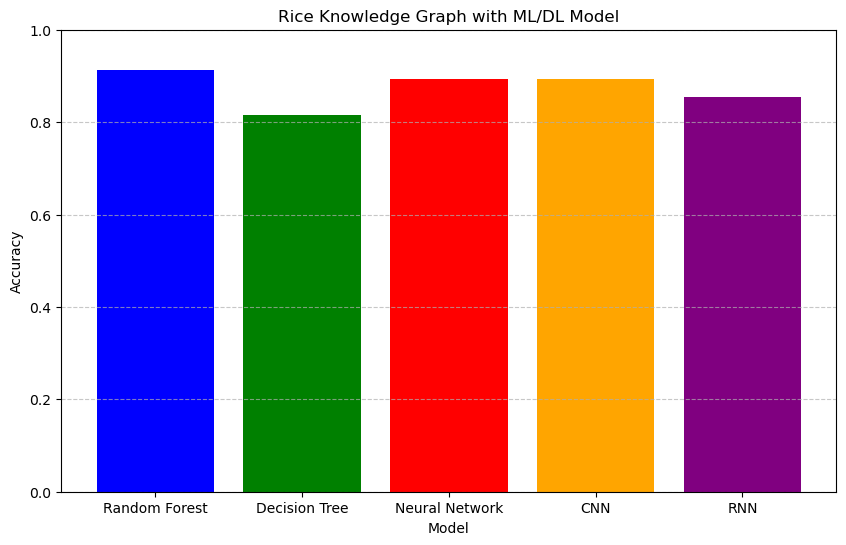

In [25]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores of four other models stored in variables

# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy scores
accuracy_scores = [np.mean(rf_accuracy), np.mean(dt_accuracy), nn_accuracy, cnn_accuracy, rnn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Rice Knowledge Graph with ML/DL Model')
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
